<font size="+2" color="navy"><b><u>HJM MODELLING (BUILT FROM GIVEN FORWARD RATES) AND PRICING CAPLET</u></b></font>

<font size="+0.5"><b><u>HJM THEORY</u></b></font> -

<b>Introduction</b>

The Heath-Jarrow-Morton (HJM) model is a mathematical framework used in finance to model and analyze interest rate movements over time. It was developed by economists David Heath, Robert Jarrow, and Andrew Morton in the early 1990s. The model is used to describe the evolution of interest rates as a function of time, allowing for interest rates to vary across different maturities.

The HJM model is particularly popular in the field of fixed-income and interest rate derivative pricing. Unlike simpler models that assume constant interest rates or use a single-factor approach, the HJM model is a multi-factor model that captures the dynamics of the entire term structure of interest rates.

One-factor models like Vasicek CIR, Ho & Lee evolve with short rates dr(t) and is calibrated to short term $z_m(t^*,t)$ market Zero coupon bonds only using formula -

$z(t;T) = e^{A(t) - B(t)}$, where A(t) and B(t) are from specific models like Vasicek, CIR, Ho & Lee.

In One-factor models, Curve is evolved with r + dr series of steps.

HJM models the evolution of interest rate curve using instantaneous forward interest rates (df).

HJM model can be used to seek arbitrage opportunities. If price given by HJM model and market price for an instrument is different then appropriate long or short position can be taken to exploit the difference in price.

<b>Modelling HJM</b>

Zero Coupon Bond Price Z can be modeled in as Stochastic Diffrential Equation (SDE) -
$$ \frac{dz}{z} = \mu(t,T)dt + \sigma(t,T)dX,$$
where,

$\mu(t,T)$ is drift process     
$\sigma(t,T)$ is volatility process    
X is Brownian motion 
    
Bond Prices evolve with t but the maturity date T is fixed ($\mu, \sigma$ for 2 years maturity will be different from $\mu, \sigma$ for 3 years maturity).

Empirically, Changes in yield give us model invariant (an i.i.d (Independent Identically Distributed process)). And change in forward rate -
$$\Delta f \propto \log Z \left(t_{i+1};T\right) - \log Z\left(t_i;T\right)$$

$$\Delta f \propto Normal(\mu, \sigma^2,\tau)$$
This model is normal for forward rates f(t;T) and log-normal for Bond Prices Z(t;T).

<br><br>
Forward rate equation is given by -<br>

$f(t,T) = -\frac{\partial}{\partial T} \log Z(t;T)$<br><br>
If $F = log Z$,<br>

<br>
<font style="color: blue;">Using Taylor series -<br>
$F(Z+dZ) = F(Z) + \frac{dF}{dZ}dZ + \frac{1}{2}\frac{d^2F}{dZ^2}dZ^2 +$ ... (higher order terms)<br>
$dF = F(Z+dZ) - F(Z) = \frac{dF}{dZ}dZ + \frac{1}{2}\frac{d^2F}{dZ^2}dZ^2$</font>   

So,

$dF = \frac{1}{Z}dZ - \frac{1}{2}(\frac{1}{Z})^2(dZ)^2$<br>
Applying Itô's lemma, which is a tool used in stochastic calculus to find the differential of a function of a stochastic process, and substituting value of $dZ$ and noting that $d(X)^2 = dt$, $(dt)^2 = 0$ and $dXdt = 0$, we get -

$dF = (\mu - \frac{1}{2}\sigma^2)dt + \sigma dX$<br>

$df(t,T) = \frac{\partial}{\partial T}[\frac{1}{2}\sigma^2(t,T) - \mu(t,T)]dt - \frac{\partial}{\partial T}\sigma(t,T) dX$, in the real world.


<br>
In risk-neutral world under measure $\mathbb{Q}$ (under risk-neutral measure expected rate of return on an asset is equal to the risk-free rate of return) -

$df(t,T) = \frac{\partial}{\partial T}[\frac{1}{2}\sigma^2(t,T) - r(t)]dt - \frac{\partial}{\partial T}\sigma(t,T) dX^{\mathbb{Q}}$, where $\mu$ is replaced by risk-free rate $r$ and this does not depend on $T$ for a given t so $\frac{\partial}{\partial T}r(t) =0$.<br>

$df(t,T) = \frac{\partial}{\partial T}[\frac{1}{2}\sigma^2(t,T)]dt - \frac{\partial}{\partial T}\sigma(t,T) dX^{\mathbb{Q}}$<br>


Let drift term of $df(t,T)$ be $m(t)$ and volatility term be $\nu (t,T)$<br>

$\nu (t,T) = -\frac{\partial}{\partial T}\sigma(t,T)$ and $\sigma(t,T) = -\int_t^T\nu(t,s) ds$<br>

$m(t) = \frac{\partial}{\partial T}[\frac{1}{2}\sigma^2(t,T)] = \sigma(t,T)\frac{\partial}{\partial T}\sigma(t,T) = \nu (t,T)\int_t^T\nu(t,s) ds$<br>

∴ $df(t,T) = [\nu (t,T)\int_t^T\nu(t,s) ds]dt+\nu (t,T)dX^{\mathbb{Q}}$<br>





$T$ is calendar time and we need to model in tenor time $\tau$, so we use Musiela Parameterisation : $\tau = T - t$

We do change of variable -
$f(t,T) → \overline{f}(t,\tau)$
<br><br>
$d\overline{f}(t,\tau) = df(t,T) + \frac{\partial f(t,T)}{\partial T}dt$

$d\overline{f}(t,\tau) = (\overline{\nu} (t,\tau)\int_0^\tau\overline{\nu}(t,s) ds + \frac{\partial f(t,\tau)}{\partial \tau})dt+\overline{\nu} (t,\tau)dX$
<br><br>
The extra derivative term $\frac{\partial f(t,\tau)}{\partial \tau}$ is called continuity correction and is slope of the yield curve. Its role is to maintain constant-tenor points of the yield curve by correcting for 'rolling on the curve' effect. As instrument expires, curve 'shifts' left in time.


So, for each $\tau_i$ we will have the $df_i$ at a given t. The interest rate changes are well-correlated across tenors. The covariance of changes in forward rates $\sum(\Delta f_i, \Delta f_{i+h})$ can be explained with few independent factors using PCA (Principal Component Analysis).<br>

So we find out the Eigenvalues and Eigenvectors for the given historical forward rates to get the volatility function -
<br>
$\overline{\nu}(\tau) = Standard Deviation * Eigenvector_\tau = \sqrt{\lambda_i} * e_{\tau}^{(i)} $, where $\lambda_i$ is Eigenvalue of Eigenvector i for the Principal component i.
<br>

By using PCA we reduce the N-dimension factors to k-factor model (selecting first k largest Eigenvalues and their corresponding vectors).
<br>

<font style="color: blue;">PCA -<br>
Let $\sum$ be the covariance matrix of forward rate changes. This can be decomposed using spectral theorem -<br>
$\sum = VΛV^{'}$</font>

<font style="color: blue;">Λ is diagonal matrix with Eigenvalues $\lambda_1, \lambda_2, ...\lambda_N$</font>
    
<font style="color: blue;">Λ = $
\begin{bmatrix}
\lambda_1 & . & . & 0 \\
. & . & . & . \\
0 & . & . &  \lambda_N \\
\end{bmatrix}
$</font>

<font style="color: blue;">V is a vectorised matrix of Eigenvectors $e^{(i)}$</font> 



Instead of picking numbers from the matrix of eigenvectors $V$, we use fitted volatility function. The fitting is done by cubic spline w.r.t tenor $\tau$ -

$\overline{\nu} (t,\tau) = \beta_0 + \beta_1\tau + \beta_2\tau^2 + \beta_3\tau^3$
<br>

We find the value of $\beta_0, \beta_1, \beta_2 and \beta_3$ and then for each tenor $\tau$ we calculate the volatility $d\overline{f}(t,\tau)$ as



$d\overline{f}(t,\tau) = (\sum_{i=1}^{k=3}\overline{\nu_i} (t,\tau)\int_0^\tau\overline{\nu_i}(t,s) ds)dt + \sum_{i=1}^{k=3}\overline{\nu_i} (t,\tau)dX_i + \frac{\partial f(t,\tau)}{\partial \tau}dt$
    
Here the drift term $\overline{m}(\tau) = (\sum_{i=1}^{k=3}\overline{\nu_i} (t,\tau)\int_0^\tau\overline{\nu_i}(t,s) ds)$
    
In python code we use the trapezium rule to do the Integration for $\int_0^\tau\overline{\nu_i}(t,s) ds$.



And then we calculate -

$\overline{f}(t+dt,\tau) = \overline{f}(t,\tau) + d\overline{f}(t,\tau)$

<font size="+0.5"><b><u>Steps for HJM Modelling</u></b></font> -
1. Get the historical Forward rate data.<br>
2. Compute co-variance of difference in the forward rate changes and decompose this covariance using PCA to get Eigenvalues and Eigenvectors.<br>
3. Fit volatility function from Principal Component Eigenvectors and using cubic spline w.r.t to tenor $\tau$ - $\overline{\nu} (t,\tau) = \beta_0 + \beta_1\tau + \beta_2\tau^2 + \beta_3\tau^3$<br>
4. Compute drift as $\overline{m}(\tau) = (\sum_{i=1}^{k=3}\overline{\nu_i} (t,\tau)\int_0^\tau\overline{\nu_i}(t,s) ds)$.<br>
5. Compute $\overline{f}(t+dt,\tau) = \overline{f}(t,\tau) + d\overline{f}(t,\tau)$. This will give us how the forward rate evolves in future.


<font size="+0.5"><b><u>Steps to Price Caplet using HJM Modelling</u></b></font> -<br>
Let there be a caplet T1 x T2 with a strike price K.
1. Compute Discount factor for time T2 as Z(0,T2)_DF_OIS from the given forward rate and Discounting OIS rate.
2. Simulate the forward rate and calculate the Forward rate at T1 for the period T1 to T2 (denote it as CplRate).
3. Compute the Caplet price = max(CplRate-K, 0) * cpltau * Z(0,T2)_DF_OIS, where cpltau = T2 - T1.
4. Repeat the Steps 2 to 3 N times to get the running average price.

<font size="+0.5"><b><u>PYTHON CODE</u></b></font> -

Import the below libraries -
1. Pandas - It is used for data analysis and manipulation. It features are -<br>
   i)   Data structure - Series and Dataframes.   
   ii) Data Loading and Handling e.g. read data from csv, reshaping datasets.   
   iii)Data Cleaning and Preparation - formatting, filtering, sorting.  
   iv)Data Exploration and Analysis - calculate descriptive statistics (like mean, median, standard deviation), visualize            data.<br> 
   v)  Integrate with other libraries like numpy, machine learning libraries (sci-kit).<br><br>   
   
2. Math - It provides mathematical functions for performing various mathematical operations like log, trigonometric (sin, cos      etc).<br><br>


3. Numpy - It is used for working with arrays. Array object in NumPy is called ndarray. It provides support for large, multi-      dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.<br><br>


4. Cufflinks -  It is essentially a connector between Plotly and Pandas, allowing users to create interactive charts with just    a few lines of code.<br><br>


5. Mathplotlib - It provides a versatile set of tools for creating a wide range of static, animated, and interactive              visualizations in Python.<br><br> 
   
6. Time - It provides various time related functions like time() - to give current time, sleep(n) - to delay the execution by      the time specified inside the bracket.

In [1]:
#Import Libraries
import pandas as pd 
import math
import numpy as np

# Plot settings
import cufflinks as cf
cf.set_config_file(offline=True)
import matplotlib.pyplot as plt

import time

<b>1. Get the historical Forward rate data.</b>

In [2]:
# Create the data
df = pd.read_csv('data/data_2.csv')

In [3]:
df

,Tenor ->\nHistoric Days\nI\nv,0.08333333,0.5,1,1.5,2,2.5,3,3.5,4,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
0,1,5.773355,6.438191,6.714223,6.651193,6.499071,6.325491,6.153406,5.992542,5.844359,...,3.419364,3.477219,3.537118,3.598512,3.661238,3.725178,3.790217,3.856237,3.923121,3.990752
1,2,5.768002,6.450607,6.750178,6.684171,6.542338,6.385233,6.230142,6.084619,5.949029,...,3.379027,3.443715,3.510840,3.579791,3.650373,3.722444,3.795859,3.870473,3.946143,4.022723
2,3,5.775773,6.440977,6.735365,6.684521,6.557741,6.410884,6.261086,6.116426,5.978175,...,3.270552,3.329351,3.390666,3.453894,3.518837,3.585342,3.653258,3.722432,3.792711,3.863944
3,4,5.743049,6.410330,6.694178,6.621525,6.490434,6.346198,6.200630,6.060120,5.925240,...,3.132529,3.189051,3.248612,3.310591,3.374752,3.440898,3.508833,3.578361,3.649285,3.721410
4,5,5.741189,6.397821,6.635751,6.550174,6.416799,6.272176,6.126186,5.984857,5.848831,...,3.011895,3.066677,3.124975,3.186154,3.249938,3.316093,3.384381,3.454567,3.526415,3.599688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1260,4.642052,4.509300,4.247059,4.208109,4.266343,4.322418,4.364044,4.394046,4.415589,...,4.025955,4.009816,3.994965,3.981300,3.968721,3.957128,3.946421,3.936498,3.927268,3.918678
1260,1261,4.623315,4.497635,4.245206,4.213077,4.272551,4.328528,4.369897,4.399785,4.421416,...,4.030694,4.014657,3.999881,3.986265,3.973707,3.962106,3.951361,3.941370,3.932043,3.923327
1261,1262,4.634780,4.531119,4.329511,4.326611,4.396316,4.456454,4.500316,4.532337,4.556000,...,4.127610,4.111753,4.097247,4.083981,4.071845,4.060730,4.050524,4.041119,4.032414,4.024353
1262,1263,4.632742,4.534663,4.318350,4.314448,4.385928,4.448206,4.494082,4.527886,4.553040,...,4.113465,4.098064,4.084078,4.071393,4.059894,4.049468,4.040000,4.031376,4.023491,4.016286


In [4]:
len(df)

1264

In [5]:
df.shape[1]

52

Copy the data into a forward rate dataframe

In [6]:
data_fwd = df.copy()
data_fwd

,Tenor ->\nHistoric Days\nI\nv,0.08333333,0.5,1,1.5,2,2.5,3,3.5,4,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
0,1,5.773355,6.438191,6.714223,6.651193,6.499071,6.325491,6.153406,5.992542,5.844359,...,3.419364,3.477219,3.537118,3.598512,3.661238,3.725178,3.790217,3.856237,3.923121,3.990752
1,2,5.768002,6.450607,6.750178,6.684171,6.542338,6.385233,6.230142,6.084619,5.949029,...,3.379027,3.443715,3.510840,3.579791,3.650373,3.722444,3.795859,3.870473,3.946143,4.022723
2,3,5.775773,6.440977,6.735365,6.684521,6.557741,6.410884,6.261086,6.116426,5.978175,...,3.270552,3.329351,3.390666,3.453894,3.518837,3.585342,3.653258,3.722432,3.792711,3.863944
3,4,5.743049,6.410330,6.694178,6.621525,6.490434,6.346198,6.200630,6.060120,5.925240,...,3.132529,3.189051,3.248612,3.310591,3.374752,3.440898,3.508833,3.578361,3.649285,3.721410
4,5,5.741189,6.397821,6.635751,6.550174,6.416799,6.272176,6.126186,5.984857,5.848831,...,3.011895,3.066677,3.124975,3.186154,3.249938,3.316093,3.384381,3.454567,3.526415,3.599688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1260,4.642052,4.509300,4.247059,4.208109,4.266343,4.322418,4.364044,4.394046,4.415589,...,4.025955,4.009816,3.994965,3.981300,3.968721,3.957128,3.946421,3.936498,3.927268,3.918678
1260,1261,4.623315,4.497635,4.245206,4.213077,4.272551,4.328528,4.369897,4.399785,4.421416,...,4.030694,4.014657,3.999881,3.986265,3.973707,3.962106,3.951361,3.941370,3.932043,3.923327
1261,1262,4.634780,4.531119,4.329511,4.326611,4.396316,4.456454,4.500316,4.532337,4.556000,...,4.127610,4.111753,4.097247,4.083981,4.071845,4.060730,4.050524,4.041119,4.032414,4.024353
1262,1263,4.632742,4.534663,4.318350,4.314448,4.385928,4.448206,4.494082,4.527886,4.553040,...,4.113465,4.098064,4.084078,4.071393,4.059894,4.049468,4.040000,4.031376,4.023491,4.016286


The forward rate data is spanning forward rates in years. For example, data in column 2 years is the forward rate from the previous time (i.e. 1.5 years) to 2 years.

<b>2. Compute co-variance of difference in the forward rate changes and decompose this covariance using PCA to get Eigenvalues and Eigenvectors.</b>

Compute the forward rate changes in the forward rates

In [7]:
# Create a table with each day rate difference for the given tenor

data_diff = data_fwd.copy()
for i in range(0, len(data_fwd)-1):
    for j in range(1, data_fwd.shape[1]):
        tenor_j = data_fwd.columns[j]
        data_diff.loc[i,tenor_j] = data_fwd.loc[i+1,tenor_j] - data_fwd.loc[i,tenor_j]
data_diff.drop(data_diff.index[-1], inplace=True)


data_diff

,Tenor ->\nHistoric Days\nI\nv,0.08333333,0.5,1,1.5,2,2.5,3,3.5,4,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
0,1,-0.005353,0.012417,0.035955,0.032978,0.043268,0.059742,0.076736,0.092077,0.104671,...,-0.040337,-0.033504,-0.026278,-0.018721,-0.010864,-0.002734,0.005642,0.014237,0.023022,0.031971
1,2,0.007771,-0.009630,-0.014813,0.000349,0.015402,0.025651,0.030944,0.031807,0.029145,...,-0.108475,-0.114364,-0.120174,-0.125897,-0.131536,-0.137102,-0.142601,-0.148042,-0.153432,-0.158779
2,3,-0.032724,-0.030646,-0.041188,-0.062995,-0.067307,-0.064686,-0.060456,-0.056306,-0.052935,...,-0.138023,-0.140300,-0.142054,-0.143303,-0.144085,-0.144444,-0.144425,-0.144071,-0.143426,-0.142534
3,4,-0.001860,-0.012509,-0.058427,-0.071351,-0.073634,-0.074021,-0.074444,-0.075263,-0.076408,...,-0.120634,-0.122373,-0.123637,-0.124438,-0.124814,-0.124806,-0.124452,-0.123794,-0.122870,-0.121722
4,5,-0.019782,0.054429,0.059360,0.071376,0.080459,0.087435,0.093467,0.098609,0.102606,...,-0.053629,-0.048595,-0.043245,-0.037634,-0.031788,-0.025727,-0.019472,-0.013047,-0.006471,0.000234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,1259,0.000642,-0.034541,-0.044296,-0.035944,-0.025476,-0.017080,-0.010893,-0.006430,-0.003291,...,0.010212,0.009865,0.009470,0.009028,0.008545,0.008024,0.007469,0.006884,0.006272,0.005636
1259,1260,-0.018737,-0.011665,-0.001853,0.004968,0.006208,0.006109,0.005852,0.005739,0.005827,...,0.004739,0.004841,0.004916,0.004965,0.004985,0.004977,0.004940,0.004872,0.004775,0.004649
1260,1261,0.011465,0.033484,0.084305,0.113534,0.123765,0.127926,0.130419,0.132552,0.134584,...,0.096916,0.097096,0.097366,0.097716,0.098138,0.098624,0.099164,0.099749,0.100371,0.101026
1261,1262,-0.002038,0.003544,-0.011160,-0.012163,-0.010388,-0.008248,-0.006234,-0.004451,-0.002960,...,-0.014145,-0.013690,-0.013169,-0.012589,-0.011951,-0.011262,-0.010525,-0.009744,-0.008923,-0.008067


In [8]:
len(data_diff)

1263

Build a covariance matrix -

In [9]:
# Build a covariance matrix

# Extract the subset of data
subset_data_diff = data_diff.iloc[0:len(data_diff), 1:data_diff.shape[1]]
subset_data_diff

,0.08333333,0.5,1,1.5,2,2.5,3,3.5,4,4.5,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
0,-0.005353,0.012417,0.035955,0.032978,0.043268,0.059742,0.076736,0.092077,0.104671,0.114068,...,-0.040337,-0.033504,-0.026278,-0.018721,-0.010864,-0.002734,0.005642,0.014237,0.023022,0.031971
1,0.007771,-0.009630,-0.014813,0.000349,0.015402,0.025651,0.030944,0.031807,0.029145,0.023948,...,-0.108475,-0.114364,-0.120174,-0.125897,-0.131536,-0.137102,-0.142601,-0.148042,-0.153432,-0.158779
2,-0.032724,-0.030646,-0.041188,-0.062995,-0.067307,-0.064686,-0.060456,-0.056306,-0.052935,-0.050492,...,-0.138023,-0.140300,-0.142054,-0.143303,-0.144085,-0.144444,-0.144425,-0.144071,-0.143426,-0.142534
3,-0.001860,-0.012509,-0.058427,-0.071351,-0.073634,-0.074021,-0.074444,-0.075263,-0.076408,-0.077644,...,-0.120634,-0.122373,-0.123637,-0.124438,-0.124814,-0.124806,-0.124452,-0.123794,-0.122870,-0.121722
4,-0.019782,0.054429,0.059360,0.071376,0.080459,0.087435,0.093467,0.098609,0.102606,0.105104,...,-0.053629,-0.048595,-0.043245,-0.037634,-0.031788,-0.025727,-0.019472,-0.013047,-0.006471,0.000234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,0.000642,-0.034541,-0.044296,-0.035944,-0.025476,-0.017080,-0.010893,-0.006430,-0.003291,-0.001185,...,0.010212,0.009865,0.009470,0.009028,0.008545,0.008024,0.007469,0.006884,0.006272,0.005636
1259,-0.018737,-0.011665,-0.001853,0.004968,0.006208,0.006109,0.005852,0.005739,0.005827,0.006079,...,0.004739,0.004841,0.004916,0.004965,0.004985,0.004977,0.004940,0.004872,0.004775,0.004649
1260,0.011465,0.033484,0.084305,0.113534,0.123765,0.127926,0.130419,0.132552,0.134584,0.136479,...,0.096916,0.097096,0.097366,0.097716,0.098138,0.098624,0.099164,0.099749,0.100371,0.101026
1261,-0.002038,0.003544,-0.011160,-0.012163,-0.010388,-0.008248,-0.006234,-0.004451,-0.002960,-0.001803,...,-0.014145,-0.013690,-0.013169,-0.012589,-0.011951,-0.011262,-0.010525,-0.009744,-0.008923,-0.008067


In [10]:
subset_data_diff_array = subset_data_diff.values

subset_data_diff_array = subset_data_diff_array.T
subset_data_diff_array

array([[-0.00535342,  0.00777081, -0.03272392, ...,  0.01146488,
        -0.00203794, -0.01890596],
       [ 0.01241669, -0.00963044, -0.03064646, ...,  0.03348433,
         0.00354395, -0.00954593],
       [ 0.03595469, -0.01481273, -0.04118763, ...,  0.08430507,
        -0.01116018, -0.02676996],
       ...,
       [ 0.0142367 , -0.14804171, -0.1440707 , ...,  0.09974885,
        -0.00974377, -0.0511702 ],
       [ 0.02302204, -0.15343169, -0.14342596, ...,  0.10037132,
        -0.00892341, -0.05134699],
       [ 0.03197083, -0.15877901, -0.14253437, ...,  0.10102612,
        -0.00806706, -0.05144172]])

In [11]:
# Calculate the covariance matrix
covariance_matrix = np.cov(subset_data_diff_array)

covariance_matrix

array([[1.56661650e-03, 3.76278095e-04, 9.40043093e-05, ...,
        2.69388481e-05, 2.89688562e-05, 3.10417948e-05],
       [3.76278095e-04, 2.52998680e-03, 2.19567144e-03, ...,
        4.96202225e-04, 5.15049459e-04, 5.34165595e-04],
       [9.40043093e-05, 2.19567144e-03, 3.23193486e-03, ...,
        8.96572116e-04, 9.21479951e-04, 9.46858796e-04],
       ...,
       [2.69388481e-05, 4.96202225e-04, 8.96572116e-04, ...,
        2.04833534e-03, 2.06301467e-03, 2.07749895e-03],
       [2.89688562e-05, 5.15049459e-04, 9.21479951e-04, ...,
        2.06301467e-03, 2.08305121e-03, 2.10300376e-03],
       [3.10417948e-05, 5.34165595e-04, 9.46858796e-04, ...,
        2.07749895e-03, 2.10300376e-03, 2.12854375e-03]])

In [12]:
# Multiply by 252/10000. To annualize it we multiply by 252 and to convert percntage to number for two rates we divide by 10000

covariance_matrix = covariance_matrix *252/10000
covariance_matrix

array([[3.94787358e-05, 9.48220799e-06, 2.36890860e-06, ...,
        6.78858972e-07, 7.30015176e-07, 7.82253228e-07],
       [9.48220799e-06, 6.37556673e-05, 5.53309202e-05, ...,
        1.25042961e-05, 1.29792464e-05, 1.34609730e-05],
       [2.36890860e-06, 5.53309202e-05, 8.14447584e-05, ...,
        2.25936173e-05, 2.32212948e-05, 2.38608417e-05],
       ...,
       [6.78858972e-07, 1.25042961e-05, 2.25936173e-05, ...,
        5.16180505e-05, 5.19879696e-05, 5.23529736e-05],
       [7.30015176e-07, 1.29792464e-05, 2.32212948e-05, ...,
        5.19879696e-05, 5.24928906e-05, 5.29956949e-05],
       [7.82253228e-07, 1.34609730e-05, 2.38608417e-05, ...,
        5.23529736e-05, 5.29956949e-05, 5.36393025e-05]])

Do the Principal Component Analysis. Select the top  k Principal components factors which sums up to 90% of the explained contribution.

In [13]:
# Step 1: Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)


# Step 2: Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Step 3: Get the top 3 eigenvalues and corresponding eigenvectors
top_3_eigenvalues = eigenvalues_sorted[:3]
top_3_eigenvectors = eigenvectors_sorted[:, :3]

# Display the results
print("Eigenvalues:")
print(top_3_eigenvalues)
print("\nEigenvectors:")
print(top_3_eigenvectors)

Eigenvalues:
[0.00202884 0.00046289 0.00016368]

Eigenvectors:
[[ 0.00351033 -0.00972625 -0.00111508]
 [ 0.05665586 -0.16326718  0.27313784]
 [ 0.10114279 -0.2389149   0.40222423]
 [ 0.11563974 -0.24345609  0.35581018]
 [ 0.12154093 -0.23509872  0.27474251]
 [ 0.12568249 -0.22656368  0.19585028]
 [ 0.12948968 -0.21903235  0.12500321]
 [ 0.13320457 -0.21206961  0.0623539 ]
 [ 0.13681963 -0.2051638   0.00709335]
 [ 0.14026214 -0.19791715 -0.04135353]
 [ 0.14344533 -0.19001071 -0.08325192]
 [ 0.1462834  -0.18118042 -0.11865757]
 [ 0.14870205 -0.17120748 -0.14754572]
 [ 0.15064229 -0.15990426 -0.16990336]
 [ 0.15207044 -0.14712506 -0.18581986]
 [ 0.15298157 -0.13278428 -0.19552188]
 [ 0.15340022 -0.11686787 -0.19936452]
 [ 0.15337685 -0.09943599 -0.19785291]
 [ 0.15297871 -0.08062996 -0.19159875]
 [ 0.15228467 -0.06067689 -0.18129946]
 [ 0.15138052 -0.03988003 -0.16770213]
 [ 0.15035008 -0.01860959 -0.15155688]
 [ 0.1492673   0.00271527 -0.13358986]
 [ 0.14819153  0.02367225 -0.11447618]
 

In [14]:
# Format into a DataFrame 
df_eigval = pd.DataFrame({"Eigenvalues": eigenvalues}) #, index=range(1,21))

In [15]:
# Work out explained proportion 
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])

#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
0,0.002029,71.31%
1,0.000463,16.27%
2,0.000164,5.75%
3,0.000085,2.98%
4,0.000051,1.79%
5,0.000033,1.15%
6,0.000015,0.54%
7,0.000004,0.14%
8,0.000001,0.05%
9,0.000000,0.01%


The top 3 Eigenvalues gives explains more than 90%. So we select the top 3 Eigenvalues and their corresponding Eigenvectors for our analysis.

In [16]:
# Subsume first 3 components into a dataframe
pcdf = pd.DataFrame(eigenvectors[:,0:3], columns=['PC1','PC2','PC3'])
pcdf[:10]

,PC1,PC2,PC3
0,0.003510,-0.009726,-0.001115
1,0.056656,-0.163267,0.273138
2,0.101143,-0.238915,0.402224
3,0.115640,-0.243456,0.355810
4,0.121541,-0.235099,0.274743
5,0.125682,-0.226564,0.195850
6,0.129490,-0.219032,0.125003
7,0.133205,-0.212070,0.062354
8,0.136820,-0.205164,0.007093
9,0.140262,-0.197917,-0.041354


In [17]:
pcdf.iplot(title='First Three Principal Components', secondary_y='PC1', secondary_y_title='PC1')

In [18]:
len(pcdf)

51

<b>3. Fit volatility function from Principal Component Eigenvectors and using cubic spline w.r.t to tenor $\tau$.<br>
$\overline{\nu} (t,\tau) = \beta_0 + \beta_1\tau + \beta_2\tau^2 + \beta_3\tau^3$</b>



In [19]:
# Extract the tenor values from the column headings of 'data_diff'
tenor_values = list(data_diff.columns[1:])

# Insert the 'tenor' column at the beginning of 'pcdf'
pcdf.insert(0, 'tenor', tenor_values)

pcdf.insert(1, 'tenor^2', tenor_values)
pcdf.insert(2, 'tenor^3', tenor_values)

pcdf = pcdf[pd.to_numeric(pcdf['tenor'], errors='coerce').notnull()]

pcdf['tenor'] = pd.to_numeric(pcdf['tenor'], errors='coerce')

pcdf['tenor'] = pcdf['tenor'].astype(float)

for i in range (0, len(pcdf)):
    pcdf.loc[i,'PC1'] = pcdf.loc[i,'PC1'] * (eigenvalues[0]**0.5)
    pcdf.loc[i,'PC2'] = pcdf.loc[i,'PC2'] * (eigenvalues[1]**0.5)
    pcdf.loc[i,'PC3'] = pcdf.loc[i,'PC3'] * (eigenvalues[2]**0.5)
    pcdf.loc[i,'tenor'] = pcdf.loc[i,'tenor'].astype(float)
    pcdf.loc[i,'tenor^2'] = pcdf.loc[i,'tenor']**2
    pcdf.loc[i,'tenor^3'] = pcdf.loc[i,'tenor']**3
    
pcdf['tenor^2'] = pcdf['tenor^2'].astype(float)
pcdf['tenor^3'] = pcdf['tenor^3'].astype(float)

pcdf

,tenor,tenor^2,tenor^3,PC1,PC2,PC3
0,0.083333,0.006944,0.000579,0.000158,-0.000209,-0.000014
1,0.500000,0.250000,0.125000,0.002552,-0.003513,0.003494
2,1.000000,1.000000,1.000000,0.004556,-0.005140,0.005146
3,1.500000,2.250000,3.375000,0.005209,-0.005238,0.004552
4,2.000000,4.000000,8.000000,0.005475,-0.005058,0.003515
5,2.500000,6.250000,15.625000,0.005661,-0.004874,0.002506
6,3.000000,9.000000,27.000000,0.005833,-0.004712,0.001599
7,3.500000,12.250000,42.875000,0.006000,-0.004563,0.000798
8,4.000000,16.000000,64.000000,0.006163,-0.004414,0.000091
9,4.500000,20.250000,91.125000,0.006318,-0.004258,-0.000529


In [20]:
# Calculate Volatility components

In [21]:
# Calculate 1st Volatility as a straight line as it provides a reasonable and simple fit (PC1)

b0_vol_1 = pcdf.iloc[:, 3].median()

print("Volatility 1 estimate:", b0_vol_1)

Volatility 1 estimate: 0.006433202063381329


In [22]:
# Estimate the volatiility of PC2 using cubic spline to get b0, b1, b2 and b3

# Vol_2=b0+b1*tau+b2*tau^2+b3*tau^3 (tau = tenor)
tau_values = pcdf.iloc[:, 0].astype(float)
vol_2_values = pcdf.iloc[:, 4]

# Perform cubic regression
coefficients_vol_2 = np.polyfit(tau_values, vol_2_values, 3)

# Extract coefficients
b3_vol_2, b2_vol_2, b1_vol_2, b0_vol_2 = coefficients_vol_2

# Output the results
print(f"b0: {b0_vol_2}")
print(f"b1: {b1_vol_2}")
print(f"b2: {b2_vol_2}")
print(f"b3: {b3_vol_2}")

b0: -0.0035681589909194733
b1: -0.000562974695132219
b2: 0.0001176871508063186
b3: -3.5811928966631643e-06


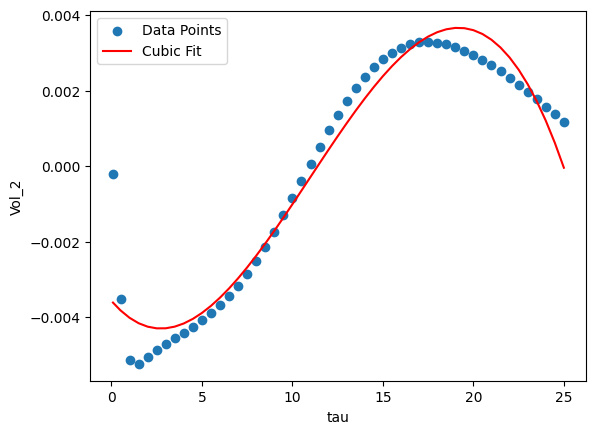

In [23]:
# Plotting the cubic regression curve
fit_curve = np.polyval(coefficients_vol_2, tau_values)
plt.scatter(tau_values, vol_2_values, label='Data Points')
plt.plot(tau_values, fit_curve, color='red', label='Cubic Fit')
plt.xlabel('tau')
plt.ylabel('Vol_2')
plt.legend()

In [24]:
# Estimate the volatiility of PC3 using cubic spline to get b0, b1, b2 and b3

# Vol_3=b0+b1*tau+b2*tau^2+b3*tau^3 (tau = tenor)
tau_values = pcdf.iloc[:, 0].astype(float)
vol_3_values = pcdf.iloc[:, 5]

# Perform cubic regression
coefficients_vol_3 = np.polyfit(tau_values, vol_3_values, 3)

# Extract coefficients
b3_vol_3, b2_vol_3, b1_vol_3, b0_vol_3 = coefficients_vol_3

# Output the results
print(f"b0: {b0_vol_3}")
print(f"b1: {b1_vol_3}")
print(f"b2: {b2_vol_3}")
print(f"b3: {b3_vol_3}")

b0: 0.004823911415532406
b1: -0.001779661581425539
b2: 0.00014368686650095188
b3: -3.179242400359592e-06


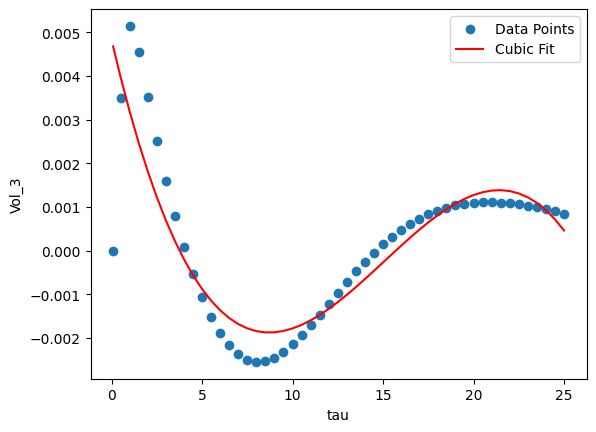

In [25]:
# Plotting the cubic regression curve
fit_curve = np.polyval(coefficients_vol_3, tau_values)
plt.scatter(tau_values, vol_3_values, label='Data Points')
plt.plot(tau_values, fit_curve, color='red', label='Cubic Fit')
plt.xlabel('tau')
plt.ylabel('Vol_3')
plt.legend()

<b>4. Compute drift as $\overline{m}(\tau) = (\sum_{i=1}^{k=3}\overline{\nu_i} (t,\tau)\int_0^\tau\overline{\nu_i}(t,s) ds)$.</b>

Compute drift $\overline{m}(\tau,T)$ for each maturity $T$

In [26]:
# Create vol_1 function
def vol_1(tau):
    vol_1 = b0_vol_1
    return vol_1

In [27]:
# Create vol_2 function
def vol_2(tau):
    vol_2 = b0_vol_2 + b1_vol_2*tau + b2_vol_2 * (tau **2) + b3_vol_2* (tau **3)
    return vol_2

In [28]:
# Create vol_3 function
def vol_3(tau):
    vol_3 = b0_vol_3 + b1_vol_3 * tau + b2_vol_3 * (tau **2) + b3_vol_3 * (tau **3)
    return vol_3

In [29]:
# Compute drift for the given tenor
def calculate_M(Tau):
    """Calculates M using the trapezium rule for numerical integration."""

    if Tau < 0.1:
        return 0

    dTau = 0.01  # Initial step
    N = int(Tau / dTau)
    dTau = Tau / N  # Step for Tau

    # Calculate M1 using trapezium rule
    M1 = 0.5 * vol_1(0)
    for i in range(1, N):  # Python's range excludes the upper bound
        M1 += vol_1(i * dTau)
    M1 += 0.5 * vol_1(Tau)
    M1 *= dTau
    M1 *= vol_1(Tau)  

    # Calculate M2 using trapezium rule (similar logic as M1)
    M2 = 0.5 * vol_2(0)
    for i in range(1, N):
        M2 += vol_2(i * dTau)
    M2 += 0.5 * vol_2(Tau)
    M2 *= dTau
    M2 *= vol_2(Tau)

    # Calculate M3 using trapezium rule (similar logic as M1 and M2)
    M3 = 0.5 * vol_3(0)
    for i in range(1, N):
        M3 += vol_3(i * dTau)
    M3 += 0.5 * vol_3(Tau)
    M3 *= dTau
    M3 *= vol_3(Tau)

    # Sum for multi-factor
    M = M1 + M2 + M3
    return M

In [30]:
# Create dataframe for drift for various Maturities T
# Create a new dataframe with 'tenor' and 'M(tenor)' columns
drift_df = pd.DataFrame(pcdf['tenor'])
drift_df['M(tenor)'] = pcdf.apply(lambda row: calculate_M(row['tenor']), axis=1)
drift_df['vol_1'] = pcdf.apply(lambda row: vol_1(row['tenor']), axis=1)
drift_df['vol_2'] = pcdf.apply(lambda row: vol_2(row['tenor']), axis=1)
drift_df['vol_3'] = pcdf.apply(lambda row: vol_3(row['tenor']), axis=1)
drift_df

,tenor,M(tenor),vol_1,vol_2,vol_3
0,0.083333,0.000000,0.006433,-0.003614,0.004677
1,0.500000,0.000036,0.006433,-0.003821,0.003970
2,1.000000,0.000069,0.006433,-0.004017,0.003185
3,1.500000,0.000100,0.006433,-0.004160,0.002467
4,2.000000,0.000128,0.006433,-0.004252,0.001814
5,2.500000,0.000156,0.006433,-0.004296,0.001223
6,3.000000,0.000182,0.006433,-0.004295,0.000692
7,3.500000,0.000208,0.006433,-0.004250,0.000219
8,4.000000,0.000233,0.006433,-0.004166,-0.000199
9,4.500000,0.000257,0.006433,-0.004045,-0.000565


In [31]:
# Transpose drift_df
transposed_drift_df = drift_df.transpose()
transposed_drift_df.columns = transposed_drift_df.iloc[0]
transposed_drift_df = transposed_drift_df[1:]
transposed_drift_df

tenor,0.083333,0.500000,1.000000,1.500000,2.000000,2.500000,3.000000,3.500000,4.000000,4.500000,...,20.500000,21.000000,21.500000,22.000000,22.500000,23.000000,23.500000,24.000000,24.500000,25.000000
M(tenor),0.000000,0.000036,0.000069,0.000100,0.000128,0.000156,0.000182,0.000208,0.000233,0.000257,...,0.000804,0.000833,0.000862,0.000890,0.000917,0.000943,0.000968,0.000992,0.001014,0.001036
vol_1,0.006433,0.006433,0.006433,0.006433,0.006433,0.006433,0.006433,0.006433,0.006433,0.006433,...,0.006433,0.006433,0.006433,0.006433,0.006433,0.006433,0.006433,0.006433,0.006433,0.006433
vol_2,-0.003614,-0.003821,-0.004017,-0.004160,-0.004252,-0.004296,-0.004295,-0.004250,-0.004166,-0.004045,...,0.003496,0.003344,0.003138,0.002874,0.002552,0.002168,0.001718,0.001202,0.000615,-0.000044
vol_3,0.004677,0.003970,0.003185,0.002467,0.001814,0.001223,0.000692,0.000219,-0.000199,-0.000565,...,0.001336,0.001374,0.001384,0.001363,0.001309,0.001220,0.001093,0.000926,0.000716,0.000461


In [32]:
# Take base time as last forward rate available in the data_fwd (last row)

# Create the simulated_fwd_rate DataFrame with the same columns as data_fwd
simulated_fwd_rate_1 = pd.DataFrame(columns=data_fwd.columns)

# Set the first row of simulated_fwd_rate to the last row of data_fwd
simulated_fwd_rate_1.loc[0] = data_fwd.iloc[-1]/100

# drop the first column

simulated_fwd_rate = simulated_fwd_rate_1.drop(simulated_fwd_rate_1.columns[0], axis=1)

simulated_fwd_rate

,0.08333333,0.5,1,1.5,2,2.5,3,3.5,4,4.5,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
0,0.046138,0.045251,0.042916,0.042833,0.043498,0.044054,0.04444,0.044708,0.044903,0.045057,...,0.040665,0.040501,0.040353,0.040219,0.040098,0.039989,0.039891,0.039802,0.039721,0.039648


<b>5. Compute $\overline{f}(t+dt,\tau) = \overline{f}(t,\tau) + d\overline{f}(t,\tau)$. This will give us how the forward rate evolves in future.</b>

In [33]:
# Compute f(t+dt,T(i) for a given Maturity T(i) and time in future t+dt (i is the column).
# f(t+dt,T(i)) = f(t,T(i))+calculate_M(T(i))*dt+(vol_1(T(i))*phi_1(random)+vol_2(T(i))*phi_2(random)+vol_3(T(i))*phi_3(random))*sqrt(dt)+(f(t+dt,T(i+1))-f(t,T(i)))/(T(i+1)-T(i))*dt

# Assume dt = 0.01
dt = 0.01

# Assume Time period for the curve be 10 years
t = 10

In [34]:
# Get the last row of subset_data_diff as the first row of simulated_fwd_rate
first_row_simulated_fwd_rate = simulated_fwd_rate.iloc[-1].values

# Create simulated_fwd_rate DataFrame with 'time(t)' column and time steps
time_steps = int(t / dt) + 1  # Number of time steps (dt time interval from 0 to 10 years)
time_column = pd.Series([i * dt for i in range(time_steps)], name='time(t)')

# Create a DataFrame with repeated rows of first_row_simulated_fwd_rate
simulated_fwd_rate_data = [first_row_simulated_fwd_rate] * time_steps
simulated_fwd_rate = pd.DataFrame(simulated_fwd_rate_data, columns=simulated_fwd_rate.columns)

# Combine 'time(t)' column and DataFrame with repeated rows
simulated_fwd_rate = pd.concat([time_column, simulated_fwd_rate], axis=1)
simulated_fwd_rate

,time(t),0.08333333,0.5,1,1.5,2,2.5,3,3.5,4,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
0,0.00,0.046138,0.045251,0.042916,0.042833,0.043498,0.044054,0.04444,0.044708,0.044903,...,0.040665,0.040501,0.040353,0.040219,0.040098,0.039989,0.039891,0.039802,0.039721,0.039648
1,0.01,0.046138,0.045251,0.042916,0.042833,0.043498,0.044054,0.04444,0.044708,0.044903,...,0.040665,0.040501,0.040353,0.040219,0.040098,0.039989,0.039891,0.039802,0.039721,0.039648
2,0.02,0.046138,0.045251,0.042916,0.042833,0.043498,0.044054,0.04444,0.044708,0.044903,...,0.040665,0.040501,0.040353,0.040219,0.040098,0.039989,0.039891,0.039802,0.039721,0.039648
3,0.03,0.046138,0.045251,0.042916,0.042833,0.043498,0.044054,0.04444,0.044708,0.044903,...,0.040665,0.040501,0.040353,0.040219,0.040098,0.039989,0.039891,0.039802,0.039721,0.039648
4,0.04,0.046138,0.045251,0.042916,0.042833,0.043498,0.044054,0.04444,0.044708,0.044903,...,0.040665,0.040501,0.040353,0.040219,0.040098,0.039989,0.039891,0.039802,0.039721,0.039648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,9.96,0.046138,0.045251,0.042916,0.042833,0.043498,0.044054,0.04444,0.044708,0.044903,...,0.040665,0.040501,0.040353,0.040219,0.040098,0.039989,0.039891,0.039802,0.039721,0.039648
997,9.97,0.046138,0.045251,0.042916,0.042833,0.043498,0.044054,0.04444,0.044708,0.044903,...,0.040665,0.040501,0.040353,0.040219,0.040098,0.039989,0.039891,0.039802,0.039721,0.039648
998,9.98,0.046138,0.045251,0.042916,0.042833,0.043498,0.044054,0.04444,0.044708,0.044903,...,0.040665,0.040501,0.040353,0.040219,0.040098,0.039989,0.039891,0.039802,0.039721,0.039648
999,9.99,0.046138,0.045251,0.042916,0.042833,0.043498,0.044054,0.04444,0.044708,0.044903,...,0.040665,0.040501,0.040353,0.040219,0.040098,0.039989,0.039891,0.039802,0.039721,0.039648


In [35]:
def simulate_fwd_rate_n_times():
    simulated_fwd_rate_i = simulated_fwd_rate.copy()
    sqrt_dt = np.sqrt(dt)
    
    # Reseed with the current time
    time.sleep(0.00003)  # Delay to ensure a different time value
    new_seed = int(time.time())  # Get the current time as an integer
    np.random.seed(new_seed)  # Reseed the generator with the new value

    for i in range(1, len(simulated_fwd_rate_i)): # To loop through rows of fwd_rate
        
        # Generate random numbers
        phi = np.random.randn(3)
        phi_1 = phi[0]
        phi_2 = phi[1]
        phi_3 = phi[2]

        
        # Calculate f(t+dt, Ti) using the given formula for the last column (use backward derivative for continuity correction)
        k = len(simulated_fwd_rate_i.columns) - 1
        Ti = simulated_fwd_rate_i.columns[k]  # Get current maturity
        f_t_Ti = simulated_fwd_rate_i.iloc[i - 1, k]  # Get f(t, Ti) from previous row
        f_tplusdt_Ti = (
            f_t_Ti
            + transposed_drift_df.iloc[0,k-1] * dt
            + (
                transposed_drift_df.iloc[1,k-1] * phi_1
                + transposed_drift_df.iloc[2,k-1] * phi_2
                + transposed_drift_df.iloc[3,k-1] * phi_3
            )
            * sqrt_dt
            + ((f_t_Ti - (simulated_fwd_rate_i.iloc[i - 1, k - 1])) / (
                float(Ti) - float(simulated_fwd_rate_i.columns[k - 1])
            )
               * dt)
        )
        # Assign the calculated value to the DataFrame
        simulated_fwd_rate_i.iloc[i, k] = f_tplusdt_Ti

        for j in range(1, len(simulated_fwd_rate.columns)-1): # to loop through columns of fwd_rate
            Ti = simulated_fwd_rate_i.columns[j]  # Get current maturity
            f_t_Ti = simulated_fwd_rate_i.iloc[i - 1, j]  # Get f(t, Ti) from previous row
            
            # Calculate f(t+dt, Ti) using the given formula for all columns except last column(use forward derivative for continuity correction)
            f_tplusdt_Ti = (
                f_t_Ti
                + (transposed_drift_df.iloc[0,j-1] * dt)
                + ((
                    transposed_drift_df.iloc[1,j-1] * phi_1
                    + transposed_drift_df.iloc[2,j-1] * phi_2
                    + transposed_drift_df.iloc[3,j-1] * phi_3
                )
                * sqrt_dt)
                + ((simulated_fwd_rate_i.iloc[i - 1, j + 1] - f_t_Ti) / (
                    float(simulated_fwd_rate_i.columns[j + 1]) - float(Ti)
                )
                   * dt)
            )

            # Assign the calculated value to the DataFrame
            simulated_fwd_rate_i.iloc[i, j] = f_tplusdt_Ti
            
    return simulated_fwd_rate_i

In [36]:
simulated_fwd_rate_n = simulate_fwd_rate_n_times()
simulated_fwd_rate_n

,time(t),0.08333333,0.5,1,1.5,2,2.5,3,3.5,4,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
0,0.00,0.046138,0.045251,0.042916,0.042833,0.043498,0.044054,0.044440,0.044708,0.044903,...,0.040665,0.040501,0.040353,0.040219,0.040098,0.039989,0.039891,0.039802,0.039721,0.039648
1,0.01,0.046044,0.045294,0.043181,0.043270,0.044072,0.044746,0.045233,0.045589,0.045856,...,0.040441,0.040288,0.040162,0.040062,0.039989,0.039942,0.039920,0.039924,0.039952,0.040004
2,0.02,0.045319,0.044516,0.042419,0.042502,0.043288,0.043951,0.044436,0.044796,0.045073,...,0.040723,0.040550,0.040396,0.040261,0.040144,0.040044,0.039960,0.039892,0.039839,0.039800
3,0.03,0.044594,0.043821,0.041829,0.041987,0.042829,0.043546,0.044084,0.044495,0.044823,...,0.041065,0.040873,0.040699,0.040540,0.040398,0.040270,0.040156,0.040055,0.039967,0.039889
4,0.04,0.043492,0.042804,0.040973,0.041252,0.042190,0.042992,0.043608,0.044090,0.044480,...,0.040533,0.040335,0.040158,0.040002,0.039867,0.039750,0.039653,0.039575,0.039515,0.039473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,9.96,0.015441,0.013681,0.011984,0.010759,0.009974,0.009601,0.009608,0.009968,0.010651,...,0.031767,0.027943,0.023841,0.019489,0.014916,0.010153,0.005227,0.000170,-0.004981,-0.010178
997,9.97,0.016019,0.014234,0.012509,0.011257,0.010449,0.010054,0.010042,0.010384,0.011052,...,0.032097,0.028271,0.024166,0.019811,0.015235,0.010466,0.005535,0.000472,-0.004686,-0.009890
998,9.98,0.015613,0.013872,0.012199,0.011001,0.010245,0.009904,0.009945,0.010340,0.011060,...,0.032834,0.028981,0.024845,0.020455,0.015839,0.011028,0.006050,0.000935,-0.004278,-0.009542
999,9.99,0.014770,0.012928,0.011148,0.009857,0.009022,0.008615,0.008603,0.008957,0.009648,...,0.032593,0.028717,0.024548,0.020114,0.015443,0.010564,0.005504,0.000296,-0.005026,-0.010412


On plotting the evolution of 3 month rate

In [37]:
simulated_fwd_rate_n.iloc[:, 7].iplot(title='Evolution of 3-Y forward points')

<b><u>Pricing the Caplet from the HJM modeled</u></b>


Price a caplet T1 x T2 with a strike price K.


In [38]:
# We will assume OIS discount rate of 0.012

def caplet_price(T_1, T_2, CplStrike, n): # For a caplet T_1 x T_2 and number of simulation is n with given strike CplStrike
    cpltau = T_2 - T_1
    caplet_price_sum = 0
    
    # Create an empty DataFrame with columns 'No. of Simulation' and 'Running average'
    caplet_price_avg = pd.DataFrame(columns=['No. of Simulation', 'Price at current Simulation', 'Running average'])
            
    # Find the column number for the column heading T_1 and T_2
    column_number_T_1 = simulated_fwd_rate_n.columns.get_loc(str(T_1))
    column_number_T_2 = simulated_fwd_rate_n.columns.get_loc(str(T_2))
               
    # Find Z(0,T_2)
    sum_Z_0_T_2 = 0
    for j in range (1, column_number_T_2+1):
        sum_Z_0_T_2 = sum_Z_0_T_2 + simulated_fwd_rate_n.loc[0, str(j)]
    Z_0_T_2 = math.exp(-1 * sum_Z_0_T_2 * cpltau)

    cont_yield_0_T_2 = -1*math.log(Z_0_T_2)/T_2 # Simulated continuous time Yield for 0 to T_2.
    spot_yield_0_T_2 = (1/(T_2)) * (math.exp(cont_yield_0_T_2 * T_2)-1)

    # Find OIS df - Z(0,T_2) as OIS
    Z_0_T_2_DF_OIS = math.exp(-1*(0.012-spot_yield_0_T_2)*T_2)
    
    #To get the forward rates to consider from 0 to T2-T1 at time T1
    fin_column_num_T = column_number_T_2 - column_number_T_1 + 1 # We add 1 as 1st column is of time(t)
                
    for i in range(0,n):
        simulated_fwd_rate_i = simulate_fwd_rate_n_times()
                
        # Find the row number where "time(t)" matches with T_1 and T_2
        matching_row_1 = simulated_fwd_rate_n[simulated_fwd_rate_n['time(t)'] == T_1].index[0]
        matching_row_2 = simulated_fwd_rate_n[simulated_fwd_rate_n['time(t)'] == T_2].index[0]

        
        sum_fwd_rates = 0
        
        #We assume 1M forward rate as zero rate, so we start with 6M(0.5) column and assume it as forward rate from 0 to 6 month
        for k in range (2, fin_column_num_T+1):
            sum_fwd_rates = sum_fwd_rates + simulated_fwd_rate_i.iloc[matching_row_1, k]*(float(simulated_fwd_rate_n.columns[k+1]) - float(simulated_fwd_rate_n.columns[k]))
            
        
        # Simulated Rate from period 0 to T_2 - T_1 after time T1 has elapsed
        CplRate = (1/cpltau) * (math.exp(sum_fwd_rates)-1)
        
        caplet_price_i = max(CplRate-CplStrike, 0)*cpltau*Z_0_T_2_DF_OIS
        caplet_price_sum = caplet_price_sum + caplet_price_i
        
        # Store the running avaerage of Caplet Price
        caplet_price_avg = pd.concat([caplet_price_avg, pd.DataFrame({'No. of Simulation': [i+1],'Price at current Simulation':[caplet_price_i] , 'Running average': [caplet_price_sum/(i+1)]})], ignore_index=True)    
    
    return caplet_price_avg        

Do Pricing of a caplet by simulating the Forward rates. This is only one price, to satisfy MC we have to generate > 2,000 prices, taken an average and check convergence. 

We will Price a forward-starting Caplet on 6M LIBOR, t=0.5.

In [39]:
#caplet_price(T_1, T_2, CplStrike, n) For a caplet T_1 x T_2 and noumber of simulation is n with given strike CplStrike
caplet_price_simulated = caplet_price(0.5, 1, 0.03, 2001)
caplet_price_simulated

,No. of Simulation,Price at current Simulation,Running average
0,1,0.006370,0.006370
1,2,0.009277,0.007823
2,3,0.005773,0.007140
3,4,0.004715,0.006534
4,5,0.009624,0.007152
...,...,...,...
1996,1997,0.002654,0.007554
1997,1998,0.009213,0.007555
1998,1999,0.010948,0.007557
1999,2000,0.009382,0.007558


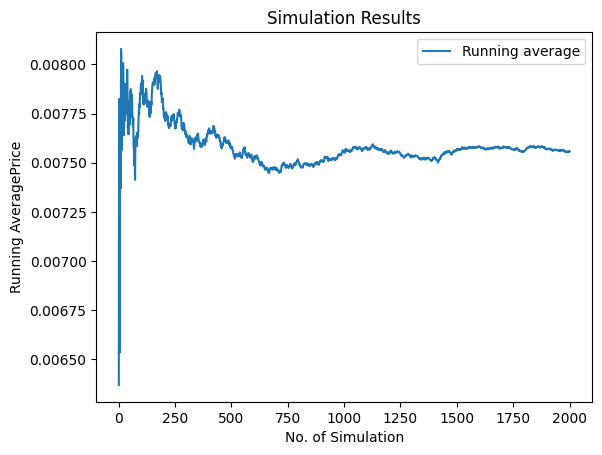

In [40]:
# Plot the graph of Runnning average vs simulation

# Plotting the graph
plt.plot(caplet_price_simulated['No. of Simulation'], caplet_price_simulated['Running average'], label='Running average')

# Adding labels and title
plt.xlabel('No. of Simulation')
plt.ylabel('Running AveragePrice')
plt.title('Simulation Results')
plt.legend()

# Display the plot
plt.show()

In [41]:
print ("Computed Caplet price from HJM Model = ", caplet_price_simulated.iloc[-1,2])

Computed Caplet price from HJM Model =  0.007558322893605469


<b><u>REFERNCES</b></u>

1. CQF Institute
2. ChatGPT
3. Bard.google.com (mow Gemini)